In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
import cv2
from collections import defaultdict
#from PIL import Image

np.random.seed(123) # for testing

image_folder_path = r'C:\Users\Tasli\Desktop\free-spoken-digit-dataset-master\Spectros'

training_data = []
training_specs = []
testing_specs = []

training_labels = []
testing_labels = []


file_paths = [f for f in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, f)) and '.png' in f]
for file_name in file_paths:
    spec_index = file_name.rsplit("_", 1)[1].rsplit(".", 1)[0]
    label = file_name[0]
    #spectrogram = Image.open(image_folder_path + '/' + file_name)
    #spectrogram = spectrogram.convert('RGB')
    #spectrogram = spectrogram.resize((224,224))
    spectrogram = cv2.imread(os.path.join(image_folder_path,file_name))
    spectrogram = cv2.resize(spectrogram, (224, 224)) 
    spectrogram = np.array(spectrogram)
    if int(spec_index) <= 4:
        testing_specs.append(spectrogram)
        testing_labels.append(label)
    else:
        training_data.append([spectrogram,label])

#shuffle the training data, then add to the lists
import random
random.shuffle(training_data)
for features,label in training_data:
    training_specs.append(features)
    training_labels.append(label)

training_specs = np.array(training_specs)
testing_specs = np.array(testing_specs)
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)


training_specs = training_specs.astype('float32') # convert types to float
testing_specs = testing_specs.astype('float32')
training_specs /= 255 # normalize data to a 0-1 value
testing_specs /= 255


training_labels = np_utils.to_categorical(training_labels, 10) # convert data to categories
testing_labels = np_utils.to_categorical(testing_labels, 10)


Using TensorFlow backend.


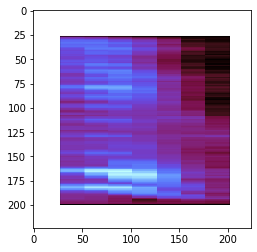

In [2]:
#print(training_specs[1])
plt.imshow(training_specs[29])
plt.show()


In [4]:
import tensorflow

#model = tensorflow.keras.applications.vgg16.VGG16(input_shape=None, alpha=1.0, include_top=True, weights=None, input_tensor=None, pooling=None, classes=10)

model = tensorflow.keras.applications.vgg16.VGG16(include_top=True, weights=None, input_tensor=None, input_shape=None, pooling=None, classes=10)

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train the model
model.fit(training_specs, training_labels, 
          batch_size=32, nb_epoch=10,validation_split=0.1, verbose=1)



Train on 1620 samples, validate on 180 samples
Epoch 1/10
  32/1620 [..............................] - ETA: 11:55

ResourceExhaustedError:  OOM when allocating tensor with shape[32,128,56,56] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node vgg16/block2_pool/MaxPool (defined at C:\Users\Tasli\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_distributed_function_2307]

Function call stack:
distributed_function
